In [1]:
1. Предобработать данные (пропуски, замена текста, дубликаты и т.д)
2. Использовать для классификации sklearn.ensemble.RandomForestClassifier
3. Подобрать лучшие гиперпараметры (n_estimators, criterion, max_depth)
4. Провести кроссвалидацию модели
5. Оценить метрики бинарной классификации (Precision, recall, f1)
6. Построить ROC-кривую для оценки качества классификатора

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,auc, fbeta_score
from sklearn.model_selection import GridSearchCV

In [4]:
titanic_df = pd.read_csv('titanicdf.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
t_df_copy = titanic_df

In [7]:
t_df_copy.drop(['PassengerId','Cabin','Ticket', 'Name'], axis = 1, inplace = True)

In [8]:
t_df_copy.dropna(inplace=True)

In [9]:
t_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [10]:
t_df_copy.duplicated().sum()

38

In [11]:
def age(t_df_copy):
    if t_df_copy.Age < 6:
        return 1
    elif t_df_copy.Age < 25:
        return 2
    elif t_df_copy.Age < 65:
        return 3
    else:
        return 4

In [12]:
t_df_copy['Age'] = t_df_copy.apply(age,axis=1)

In [13]:
t_df_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,2,1,0,7.2500,S
1,1,1,female,3,1,0,71.2833,C
2,1,3,female,3,0,0,7.9250,S
3,1,1,female,3,1,0,53.1000,S
4,0,3,male,3,0,0,8.0500,S


In [14]:
t_df_copy2 = pd.get_dummies(data = t_df_copy, columns=['Sex','Embarked'])

In [15]:
t_df_copy2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,2,1,0,7.2500,0,1,0,0,1
1,1,1,3,1,0,71.2833,1,0,1,0,0
2,1,3,3,0,0,7.9250,1,0,0,0,1
3,1,1,3,1,0,53.1000,1,0,0,0,1
4,0,3,3,0,0,8.0500,0,1,0,0,1


In [16]:
X_train, X_test, y_train, y_test = train_test_split(t_df_copy2.drop('Survived',axis=1), t_df_copy2['Survived'], test_size = 0.25, random_state = 78)

In [17]:
rfc = RandomForestClassifier()


In [18]:
model = rfc.fit(X_train, y_train)
pred = model.predict(X_test)

C:\Users\ILYA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [19]:
print('Precision:',precision_score(y_test,pred))
print('Recall:',recall_score(y_test,pred))
print('F1:',f1_score(y_test,pred))

Precision: 0.676923076923077
Recall: 0.6027397260273972
F1: 0.6376811594202899


In [20]:
#подбор гиперпараметров 

tree_para = {'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
             'n_estimators':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [21]:
rfc_gs = GridSearchCV(RandomForestClassifier(), tree_para, cv=10)
rfc_gs.fit(X_train, y_train)

C:\Users\ILYA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150], 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
rfc_gs.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 40}

In [23]:
rfc_best = RandomForestClassifier(criterion = 'gini', max_depth = 6, n_estimators = 40)

In [24]:
new_model = rfc_best.fit(X_train, y_train)
new_pred = new_model.predict(X_test)

In [25]:
print('Precision:',precision_score(y_test,new_pred))
print('Recall:',recall_score(y_test,new_pred))
print('F1:',f1_score(y_test,new_pred))

Precision: 0.8809523809523809
Recall: 0.5068493150684932
F1: 0.6434782608695652


In [32]:
# кросс валидация
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=50)
scores = cross_val_score(new_model, X_train, y_train, cv=cv, scoring='precision')

In [33]:
scores

array([0.77272727, 0.8372093 , 0.88888889, 0.89130435, 0.79591837,
       0.88372093, 0.71111111, 0.76190476, 0.85714286, 0.81632653])

In [28]:
pred_proba = new_model.predict_proba(X_test)[:,1]

In [29]:
fpr, tpr, treshold = roc_curve(y_test, pred_proba)
tree_auc = roc_auc_score(y_test, pred_proba)
print('DecisionTreeClassifier: ROC AUC=%.3f' % (tree_auc))

DecisionTreeClassifier: ROC AUC=0.815


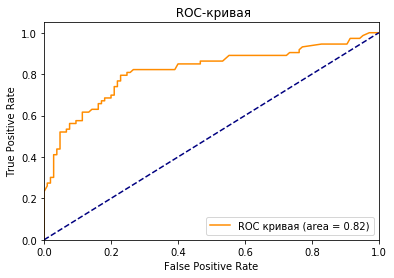

In [30]:
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,  color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC-кривая')
plt.legend(loc="lower right")
plt.show()